In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from operator import attrgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [104]:
df = pd.read_csv('supermarket.csv')
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
578077,200738,20071116,6,12,1,0.01,PRD0903678,CL00222,DEP00076,G00023,...,UM,NaN,994108400460274,S,MM,Small Shop,Grocery,STORE00001,LS,E02
578078,200716,20070612,3,12,1,13.76,PRD0902312,CL00230,DEP00081,G00027,...,UM,OA,994106200802520,L,UM,Top Up,Fresh,STORE00001,LS,E02
578079,200637,20061109,5,16,1,4.47,PRD0900396,CL00229,DEP00081,G00027,...,UM,NaN,994103100229855,L,MM,Full Shop,Mixed,STORE00001,LS,E02
578080,200717,20070624,1,10,1,4.92,PRD0903065,CL00229,DEP00081,G00027,...,UM,YF,994106300437841,L,MM,Full Shop,Mixed,STORE00001,LS,E02
578081,200744,20071229,7,14,1,9.27,PRD0901923,CL00229,DEP00081,G00027,...,UM,NaN,994109000359411,L,MM,Top Up,Mixed,STORE00001,LS,E02


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

In [106]:
# Found missing values on CUST_CODE, CUST_PRICE_SENSITIVITY, CUST_LIFESTAGE columns
df.isna().sum()

SHOP_WEEK                        0
SHOP_DATE                        0
SHOP_WEEKDAY                     0
SHOP_HOUR                        0
QUANTITY                         0
SPEND                            0
PROD_CODE                        0
PROD_CODE_10                     0
PROD_CODE_20                     0
PROD_CODE_30                     0
PROD_CODE_40                     0
CUST_CODE                    85588
CUST_PRICE_SENSITIVITY       85588
CUST_LIFESTAGE              144940
BASKET_ID                        0
BASKET_SIZE                      0
BASKET_PRICE_SENSITIVITY         0
BASKET_TYPE                      0
BASKET_DOMINANT_MISSION          0
STORE_CODE                       0
STORE_FORMAT                     0
STORE_REGION                     0
dtype: int64

In [107]:
# Clean missing values
df.dropna(subset=['CUST_CODE'], inplace=True)
df['CUST_LIFESTAGE'] = df['CUST_LIFESTAGE'].fillna('XX')
df.isna().sum()

SHOP_WEEK                   0
SHOP_DATE                   0
SHOP_WEEKDAY                0
SHOP_HOUR                   0
QUANTITY                    0
SPEND                       0
PROD_CODE                   0
PROD_CODE_10                0
PROD_CODE_20                0
PROD_CODE_30                0
PROD_CODE_40                0
CUST_CODE                   0
CUST_PRICE_SENSITIVITY      0
CUST_LIFESTAGE              0
BASKET_ID                   0
BASKET_SIZE                 0
BASKET_PRICE_SENSITIVITY    0
BASKET_TYPE                 0
BASKET_DOMINANT_MISSION     0
STORE_CODE                  0
STORE_FORMAT                0
STORE_REGION                0
dtype: int64

In [108]:
df[['QUANTITY', 'SPEND']].describe().round(5).transpose()

,count,mean,std,min,25%,50%,75%,max
QUANTITY,492494.0,1.52764,1.57281,1.00,1.00,1.00,1.00,129.00
SPEND,492494.0,1.92788,2.69127,0.01,0.77,1.24,2.11,346.46


In [109]:
# clean data type
df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')
df['SHOP_MONTH'] = df['SHOP_DATE'].dt.to_period('m')

In [110]:
df['SHOP_DATE'].max()

Timestamp('2008-07-06 00:00:00')

In [111]:
# filter month
df = df.loc[df['SHOP_MONTH']<='2008-06']

### EDA

In [112]:
n_basket = df.groupby(['CUST_CODE'])['BASKET_ID'].nunique()
mult_orders_perc = np.sum(n_basket > 1) / df['CUST_CODE'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

69.99% of customers ordered more than once.


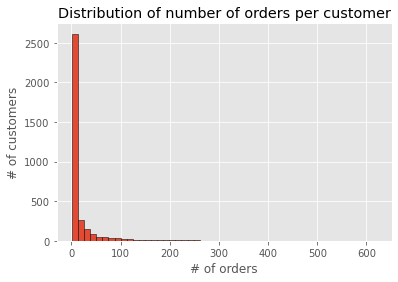

In [113]:
# Your code to calculate n_basket goes here

plt.hist(n_basket, bins=50, edgecolor='black')  # Create histogram using matplotlib
plt.title('Distribution of number of orders per customer')
plt.xlabel('# of orders')
plt.ylabel('# of customers')
plt.show()


### Cohort Analysis

In [114]:
df_cohort = df.copy()
df_cohort = df_cohort[['CUST_CODE', 'BASKET_ID', 'SHOP_MONTH']].drop_duplicates()

df_cohort['cohort'] = df_cohort.groupby('CUST_CODE')['SHOP_MONTH'].transform('min')

df_cohort = df_cohort.groupby(['cohort', 'SHOP_MONTH']).agg(n_customers=('CUST_CODE', 'nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.SHOP_MONTH - df_cohort.cohort).apply(attrgetter('n'))

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

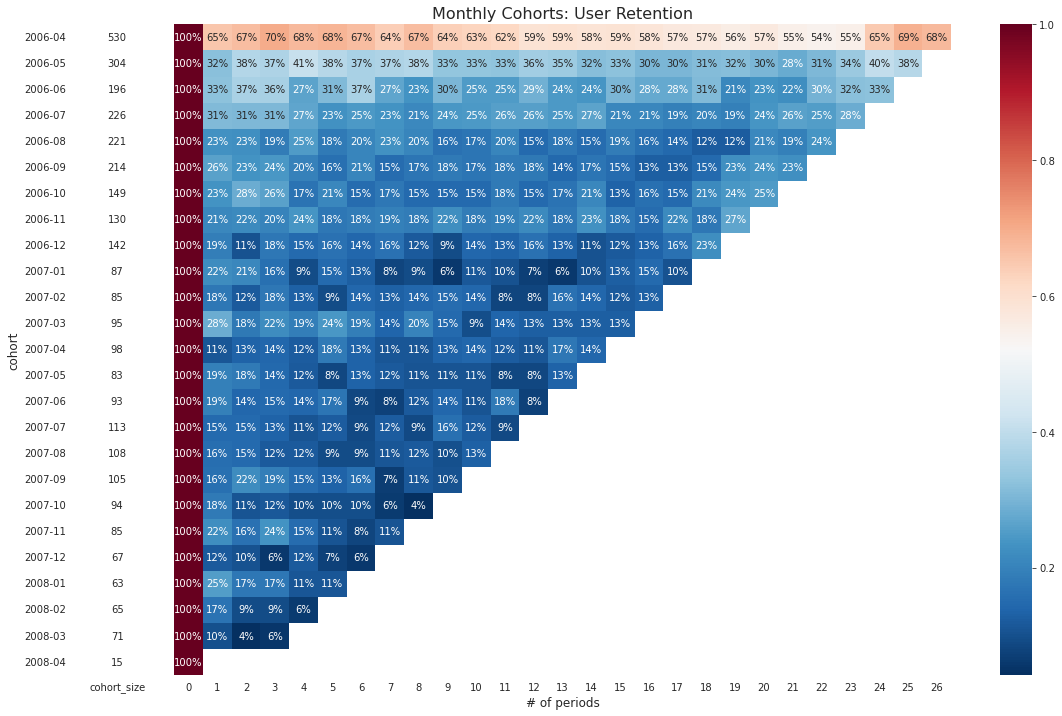

In [115]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 10), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdBu_r',  # Red and blue colormap
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

plt.show()

### Customer Movement Analysis

In [116]:
df_churn = df.copy()
df_churn = df_churn[['CUST_CODE', 'SHOP_MONTH']].drop_duplicates().sort_values(by='SHOP_MONTH').reset_index(drop=True)
df_churn['start_month'] = df_churn.groupby('CUST_CODE')['SHOP_MONTH'].transform('min')
df_churn['period_number'] = (df_churn['SHOP_MONTH'] - df_churn['start_month']).apply(attrgetter('n')).astype(int)

df_churn.tail(5)

,CUST_CODE,SHOP_MONTH,start_month,period_number
22147,CUST0000132570,2008-06,2006-04,26
22148,CUST0000136043,2008-06,2006-04,26
22149,CUST0000550874,2008-06,2006-04,26
22150,CUST0000529999,2008-06,2007-08,10
22151,CUST0000915221,2008-06,2006-08,22


In [117]:
# set status labels

df_churn['labels'] = df_churn.apply(lambda row: 'new' if row['SHOP_MONTH'] == row['start_month'] else '', axis=1)
maxmonth = df_churn['SHOP_MONTH'].max()

for cust_code in df_churn['CUST_CODE'].unique() :
    period = df_churn.loc[df_churn['CUST_CODE'] == cust_code, :]['period_number']
    n = 0
    
    for p in period:
        if n+1==p : 
            df_churn.loc[(df_churn['CUST_CODE'] == cust_code) & (df_churn['period_number'] == p), ['labels']] = df_churn.loc[(df_churn['CUST_CODE'] == cust_code) & (df_churn['period_number'] == p), ['labels']].replace('','repeat')
            n+=1

        elif n+1 < p :
            last_order = df_churn.loc[(df_churn['CUST_CODE'] == cust_code) & (df_churn['period_number'] == n)]
            new_row = pd.DataFrame({'CUST_CODE': cust_code, 'labels': 'churn', 'period_number':n+1, 'SHOP_MONTH':last_order['SHOP_MONTH'].values[0]+1}, index=[0])
            df_churn = pd.concat([new_row,df_churn.loc[:]])

            df_churn.loc[(df_churn['CUST_CODE'] == cust_code) & (df_churn['period_number'] == p), ['labels']] = df_churn.loc[(df_churn['CUST_CODE'] == cust_code) & (df_churn['period_number'] == p), ['labels']].replace('','reactivated')
            n=p
            
    user_maxmonth = df_churn[df_churn['CUST_CODE'] == cust_code]['SHOP_MONTH'].max()
    if user_maxmonth != maxmonth:
        new_row = pd.DataFrame({'CUST_CODE': cust_code, 'labels': 'churn', 'period_number':p+1, 'SHOP_MONTH':user_maxmonth+1}, index=[0])
        df_churn = pd.concat([new_row,df_churn.loc[:]])

df_churn.tail(5)

,CUST_CODE,labels,period_number,SHOP_MONTH,start_month
22147,CUST0000132570,repeat,26,2008-06,2006-04
22148,CUST0000136043,repeat,26,2008-06,2006-04
22149,CUST0000550874,repeat,26,2008-06,2006-04
22150,CUST0000529999,reactivated,10,2008-06,2007-08
22151,CUST0000915221,repeat,22,2008-06,2006-08


In [118]:
df_churn_plot = pd.pivot_table(data=df_churn, values='CUST_CODE', index='SHOP_MONTH', columns='labels', aggfunc='count', fill_value=0).reset_index()
df_churn_plot['churn'] = -df_churn_plot['churn']
df_churn_plot['SHOP_MONTH'] = df_churn_plot['SHOP_MONTH'].astype('str')

df_churn_plot.tail(5)

labels,SHOP_MONTH,churn,new,reactivated,repeat
22,2008-02,-271,65,218,510
23,2008-03,-272,71,236,521
24,2008-04,-324,15,386,504
25,2008-05,-357,0,385,548
26,2008-06,-363,0,370,570


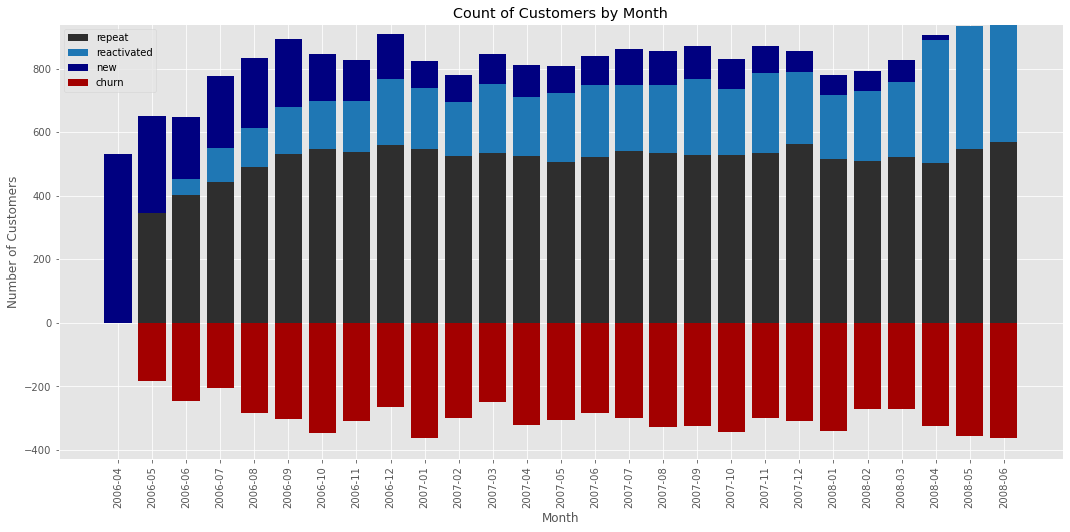

In [119]:
# Define custom color palette with darker shades
custom_palette = ['#2E2E2E', '#1F77B4', '#000080', '#A30000']

# Set the custom color palette
sns.set_palette(custom_palette)

plt.figure(figsize=(18, 8))
ax = plt.gca()
bottoms = 0 

labels = ['repeat', 'reactivated', 'new']
for i in range(len(labels)):
    plt.bar(x=df_churn_plot['SHOP_MONTH'],
            height=df_churn_plot[labels[i]],
            bottom=bottoms,
            label=labels[i])

    bottoms += df_churn_plot[labels[i]].fillna(0)

plt.bar(height=df_churn_plot['churn'], 
        x=df_churn_plot['SHOP_MONTH'], 
        bottom=0,
        label='churn')

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Count of Customers by Month')

plt.show()

### Churn Prediction

In [120]:
df_2008q1 = df.loc[(df['SHOP_MONTH']>='2008-01') & (df['SHOP_MONTH']<='2008-03')]
df_2008m4 = df.loc[(df['SHOP_MONTH']=='2008-04')][['CUST_CODE']].drop_duplicates()

In [121]:
# create feature df
df_f = df_2008q1[['CUST_CODE']].drop_duplicates().reset_index(drop=True)

df_f = df_f.merge(
    df_2008q1.groupby(['CUST_CODE', 'BASKET_ID']).agg(
        spend = ('SPEND', 'sum'),
        date_min = ('SHOP_DATE', 'min'),
        date_max = ('SHOP_DATE', 'max')).reset_index().groupby('CUST_CODE').agg(bkt_size = ('spend', 'mean'), 
                                                                    num_trans = ('spend', 'count'),
                                                                    total_spend = ('spend', 'sum'),
                                                                    date_min = ('date_min', 'min'),
                                                                    date_max = ('date_max', 'max')
                                                                    ),
    how='left', on='CUST_CODE'
)

df_f = df_f.merge(
    df_2008q1.groupby('CUST_CODE').agg(
        num_date = ('SHOP_DATE', 'nunique'),
        num_week = ('SHOP_WEEK', 'nunique')),
    how='left', on='CUST_CODE'
)

df_f = df_f.merge(
    df_2008q1.loc[df_2008q1['SHOP_MONTH'] > (df_2008q1['SHOP_MONTH'].max() - 1), :].groupby(['CUST_CODE', 'BASKET_ID']).agg(
        spend = ('SPEND', 'sum')).reset_index().groupby('CUST_CODE').agg(bkt_size_1m = ('spend', 'mean'), 
                                                                    num_trans_1m = ('spend', 'count'),
                                                                    total_spend_1m = ('spend', 'sum')
                                                                    ),
    how='left', on='CUST_CODE'
)

df_f = df_f.merge(
    df_2008q1.loc[df_2008q1['SHOP_MONTH'] > (df_2008q1['SHOP_MONTH'].max() - 2), :].groupby(['CUST_CODE', 'BASKET_ID']).agg(
        spend = ('SPEND', 'sum')).reset_index().groupby('CUST_CODE').agg(bkt_size_2m = ('spend', 'mean'), 
                                                                    num_trans_2m = ('spend', 'count'),
                                                                    total_spend_2m = ('spend', 'sum')
                                                                    ),
    how='left', on='CUST_CODE'
)

df_f['tbp'] = (df_f['date_max']-df_f['date_min']).dt.days / df_f['num_trans']
df_f['recency'] = (df_2008q1['SHOP_DATE'].max()-df_f['date_max']).dt.days

df_f.drop(columns=['date_min', 'date_max'], inplace=True)

# fill null values
df_f = df_f.fillna(0)

df_f.tail(5)

,CUST_CODE,bkt_size,num_trans,total_spend,num_date,num_week,bkt_size_1m,num_trans_1m,total_spend_1m,bkt_size_2m,num_trans_2m,total_spend_2m,tbp,recency
1300,CUST0000272029,2.56,1,2.56,1,1,0.00,0.0,0.00,0.00,0.0,0.00,0.0,63
1301,CUST0000937752,0.75,1,0.75,1,1,0.00,0.0,0.00,0.00,0.0,0.00,0.0,83
1302,CUST0000218304,1.54,1,1.54,1,1,0.00,0.0,0.00,0.00,0.0,0.00,0.0,67
1303,CUST0000280015,1.11,1,1.11,1,1,0.00,0.0,0.00,0.00,0.0,0.00,0.0,75
1304,CUST0000259310,0.03,1,0.03,1,1,0.03,1.0,0.03,0.03,1.0,0.03,0.0,19


In [122]:
df_f.describe()

,bkt_size,num_trans,total_spend,num_date,num_week,bkt_size_1m,num_trans_1m,total_spend_1m,bkt_size_2m,num_trans_2m,total_spend_2m,tbp,recency
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000
mean,13.655547,5.629119,77.478460,5.245211,3.796935,9.597346,1.996935,28.201241,11.904624,3.817625,53.289027,5.929084,27.231418
std,14.512916,8.344504,122.952007,7.126354,3.780113,14.535293,3.109700,48.500525,14.609769,5.653369,86.149215,7.227038,25.826553
min,0.010000,1.000000,0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.340000,1.000000,5.640000,1.000000,1.000000,0.000000,0.000000,0.000000,1.370000,1.000000,1.540000,0.000000,5.000000
50%,9.212222,2.000000,25.820000,2.000000,2.000000,3.145000,1.000000,4.400000,6.760000,1.000000,16.440000,3.913043,19.000000
75%,19.350000,6.000000,86.150000,6.000000,5.000000,13.815000,2.000000,36.590000,16.680000,4.000000,60.940000,9.833333,45.000000
max,154.870000,78.000000,870.980000,52.000000,14.000000,107.880000,26.000000,397.680000,123.240000,47.000000,616.940000,43.000000,90.000000


In [123]:
df_2008m4['purchase'] = 1
df_f = pd.merge(df_f, df_2008m4[['CUST_CODE', 'purchase']], how='left', on='CUST_CODE')
df_f['purchase'] = df_f['purchase'].fillna(0)
df_f.tail(3)

,CUST_CODE,bkt_size,num_trans,total_spend,num_date,num_week,bkt_size_1m,num_trans_1m,total_spend_1m,bkt_size_2m,num_trans_2m,total_spend_2m,tbp,recency,purchase
1302,CUST0000218304,1.54,1,1.54,1,1,0.00,0.0,0.00,0.00,0.0,0.00,0.0,67,0.0
1303,CUST0000280015,1.11,1,1.11,1,1,0.00,0.0,0.00,0.00,0.0,0.00,0.0,75,1.0
1304,CUST0000259310,0.03,1,0.03,1,1,0.03,1.0,0.03,0.03,1.0,0.03,0.0,19,0.0


In [124]:
df_f['purchase'].value_counts()

purchase
1.0    666
0.0    639
Name: count, dtype: int64

In [125]:
X = df_f.drop(columns=['CUST_CODE', 'purchase'])
y = df_f['purchase']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [126]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the HistGradientBoostingClassifier model
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.76      0.72       122
         1.0       0.77      0.69      0.73       139

    accuracy                           0.72       261
   macro avg       0.73      0.73      0.72       261
weighted avg       0.73      0.72      0.72       261



In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Preprocess data to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_imputed = imputer.fit_transform(X)

# Create a RandomForestClassifier
clf = RandomForestClassifier()

# Train the classifier on your imputed data
clf.fit(X_imputed, y)

# Get the feature importance scores
importance_scores = clf.feature_importances_

# Sort the features based on importance in descending order
sorted_indices = np.argsort(importance_scores)[::-1]

# Print the feature rankings
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i+1}: Feature {df_f.columns[idx+1]}, Importance score: {importance_scores[idx]}")

Rank 1: Feature total_spend, Importance score: 0.1426325110562205
Rank 2: Feature bkt_size, Importance score: 0.10867947992610734
Rank 3: Feature recency, Importance score: 0.09975414138671432
Rank 4: Feature num_trans, Importance score: 0.08694969905921235
Rank 5: Feature tbp, Importance score: 0.08354259399203355
Rank 6: Feature total_spend_2m, Importance score: 0.08138392318510848
Rank 7: Feature num_week, Importance score: 0.07500393175150338
Rank 8: Feature bkt_size_2m, Importance score: 0.07359403369147127
Rank 9: Feature num_date, Importance score: 0.06792534214076983
Rank 10: Feature num_trans_2m, Importance score: 0.0534859976680991
Rank 11: Feature bkt_size_1m, Importance score: 0.05019500308908481
Rank 12: Feature total_spend_1m, Importance score: 0.0495524852910451
Rank 13: Feature num_trans_1m, Importance score: 0.027300857762629943


In [128]:
df_spend = df_f[['CUST_CODE', 'total_spend', 'purchase']].sort_values(by='total_spend', ascending=False).reset_index(drop=True)

# find the customers who spend 80% of total sales
spend80 = df_f['total_spend'].sum()*0.8
cus_id80 = []
spend = 0

for i in range(len(df_spend)):
    spend += df_spend['total_spend'][i]
    cus_id80.append(df_spend['CUST_CODE'][i])
    if spend > spend80:
        break

In [129]:
# find churn from filtered customers
cust_spend80_nonpur = df_spend.loc[(df_spend['CUST_CODE'].isin(cus_id80)) & (df_spend['purchase']==0)].reset_index(drop=True)
cust_spend80_nonpur.head(5)

,CUST_CODE,total_spend,purchase
0,CUST0000953474,445.44,0.0
1,CUST0000644466,370.63,0.0
2,CUST0000214997,285.31,0.0
3,CUST0000568678,285.04,0.0
4,CUST0000916687,269.01,0.0
